In [1]:
import sys
sys.path.append('../..')

In [2]:
from astropy import units as u
from IPython.display import Image

In [3]:
from gunagala.imager import create_imagers
from pocs.utils import hdr


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


# Create Imager objects from performance.yaml config file

In [4]:
imagers = create_imagers()

# Create a sequence of exposures using an Imager object

In [5]:
imager = imagers['canon_sbig_dark']

In [6]:
exposure_parameters = {'filter_name': 'g',
                       'bright_limit': 10  * u.ABmag,
                       'exp_time_ratio': 2,
                       'longest_exp_time': 300 * u.second,
                       'num_long_exp': 1}

In [7]:
explist = imager.exp_time_sequence(**exposure_parameters)
explist

<Quantity [   1.17,   2.34,   4.69,   9.38,  18.75,  37.5 ,  75.  ,
            150.  , 300.  ] s>

# Calculate total exposure time and total elapsed time

In [8]:
explist.sum()

<Quantity 598.8299999999999 s>

In [9]:
imager.total_elapsed_time(explist)

<Quantity 604.8285 s>

# Calculate point saturation limits

In [10]:
imager.point_source_saturation_mag(explist, filter_name='g')

<Magnitude [  9.69827192, 10.45104077, 11.2063227 , 11.95967538,
             12.71322688, 13.46892104, 14.22776141, 14.99297666,
             15.77128241] mag(AB)>

# Plot point source SNR versus magnitude

In [11]:
mags, snrs = imager.snr_vs_ABmag(explist, filter_name='g', plot='snr_vs_mag_example.png')

/mnt/data/ajh/Documents/virtualenvs/python3.5.2/lib/python3.5/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in true_divide
  *arrays, **kwargs)


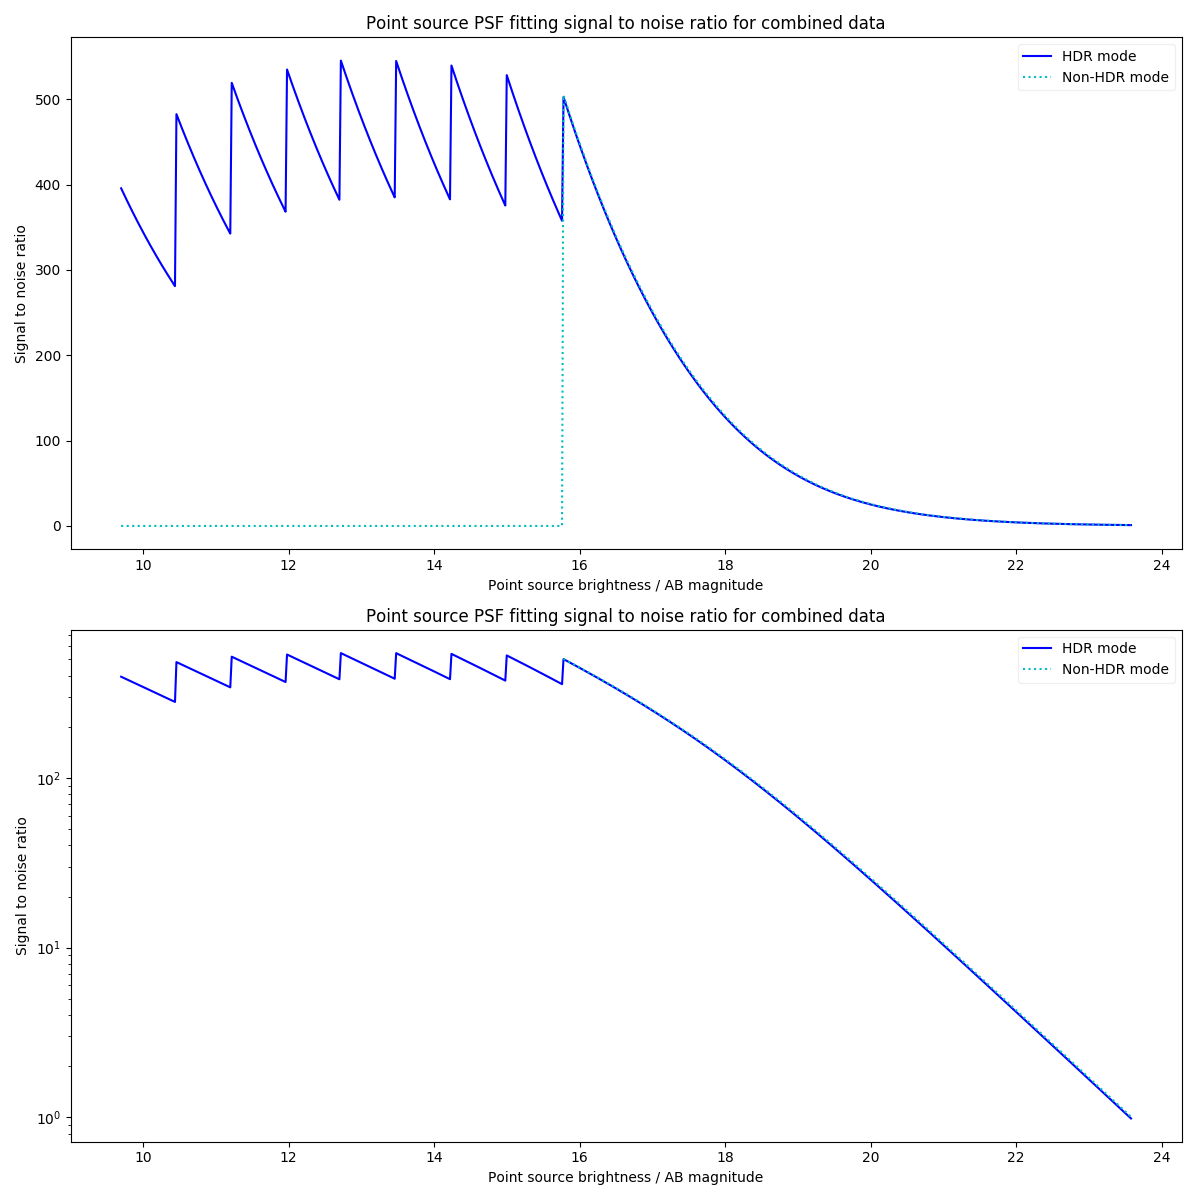

In [12]:
Image('snr_vs_mag_example.png')

# Generates a list of target details for a sequence of dithered, HDR exposures

In [15]:
name = 'M6 Toll'
base = "16h52m42.2s -38d37m12s"

target_list = hdr.get_target_list(target_name=name,
                                  imagers=imagers,
                                  primary_imager='canon_sbig_dark',
                                  base_position=base,
                                  exposure_parameters=exposure_parameters)
target_list

[{'exp_time': (1.17,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m33.8181s -38d37m57.5361s',
  'priority': 100},
 {'exp_time': (2.34,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m43.4482s -38d05m42.0944s',
  'priority': 100},
 {'exp_time': (4.69,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m18.0142s -38d05m24.5924s',
  'priority': 100},
 {'exp_time': (9.38,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m27.9891s -38d37m57.605s',
  'priority': 100},
 {'exp_time': (18.75,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m23.2743s -39d09m57.099s',
  'priority': 100},
 {'exp_time': (37.5,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m29.4952s -39d04m38.5383s',
  'priority': 100},
 {'exp_time': (75.0,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h50m22.1326s -39d04m34.2654s',
  'priority': 100},
 {'exp_time': (150.0,),
  'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h50